In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
     

In [16]:
titanic =pd.read_csv("titanic.csv",encoding='latin-1')

In [17]:
titanic1 = titanic.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
titanic1['Age'].fillna(titanic1['Age'].mean(), inplace=True)
titanic1 = pd.get_dummies(titanic1, columns=['Sex'])
     

In [18]:
features =  titanic.drop(['Survived'],axis=1)
target= titanic['Survived']
     

In [19]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
model=RandomForestClassifier(random_state=42)


In [20]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)



In [22]:
categorical_columns = ['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [26]:
missing_columns = set(categorical_columns) - set(x_train.columns)
if missing_columns:
    print(f"Columns {missing_columns} are not present in x_train.")
else:
    for column in categorical_columns:
        label_encoder = LabelEncoder()
        x_train[column] = label_encoder.fit_transform(x_train[column])

Columns {'Cabin', 'Name', 'Embarked', 'Fare', 'Ticket'} are not present in x_train.


In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [29]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [30]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].mean(), inplace=True)

In [31]:
titanic = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)

In [32]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [36]:
X = X.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
predictions = model.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [41]:
print('Classification Report:')
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_text

     

In [49]:
tree = model.estimators_[0]
tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)

|--- Sex_male <= 0.50
|   |--- class: 1.0
|--- Sex_male >  0.50
|   |--- class: 0.0



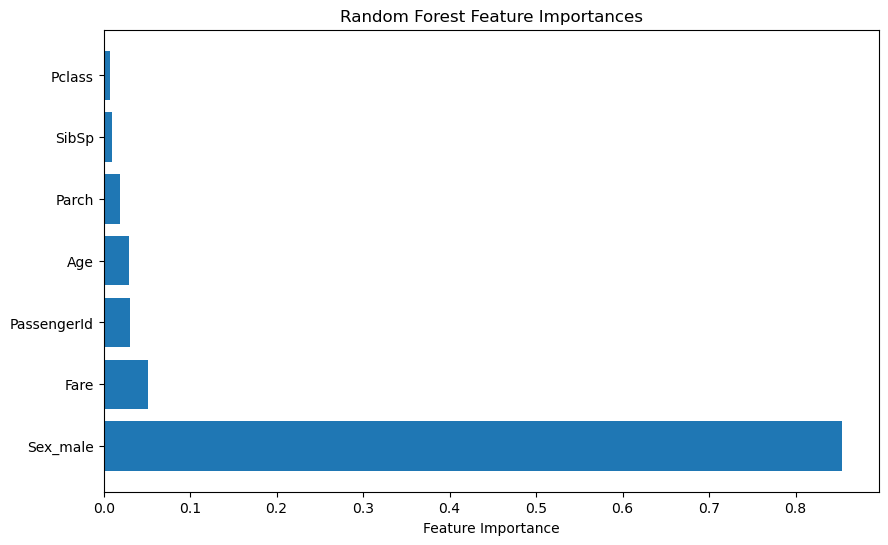

In [50]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()